**코호트 분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* process.01
* process.02
* process.03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ Ecommerce 코호트 분석
```  

> **프로젝트유형**

```
▶ 이커머스 데이터 활용 코호트 분석

```

> **학습목표**

```
▶ 코호트 분석의 원리와 방법론에 대한 깊은 이해 습득
▶ 이커머스 데이터의 특성을 파악하고, 고객의 재구매, 이탈 등의 패턴을 분석하는 능력 개발
▶ 다양한 기간과 세그먼트에 따른 고객 행동의 변화를 시각적으로 표현하는 능력 향상
▶ 코호트 분석 결과를 바탕으로 마케팅 및 영업 전략을 제안할 수 있는 능력 개발
```

> **예상 결과물**

```
▶ 각 코호트별 재구매, 이탈률 등의 지표 분석 보고서
▶ 시간에 따른 고객 행동 변화를 나타내는 시각화 자료 (히트맵, 그래프 등)
▶ 주요 코호트의 특징 및 추세 파악에 대한 문서화
▶ 분석 결과를 기반으로 한 마케팅 및 영업 전략 제안서
```


## **문제상황 Introduction**
---
> **시나리오**

```
기업 Zeta는 자사의 이커머스 사이트에서의 고객 행동 패턴을 더 잘 이해하고자 한다. 최근, 고객들의 재구매율이 떨어지는 경향을 보이며, 이에 대한 원인과
대응 방안을 찾고자 한다. 마케팅 팀은 고객의 재구매 및 이탈 패턴을 분석하기 위해 "코호트 분석" 프로젝트를 시작하기로 결정한다.
마케팅팀은 고객들의 최초 구매 월을 기준으로 코호트를 형성한다. 예를 들어, 1월에 처음 구매한 고객들, 2월에 처음 구매한 고객들 등으로 그룹을 나눈다.
이러한 코호트 그룹별로 이후의 월별 재구매율, 이탈률 등의 지표를 분석한다. 이 때, CohortIndex라는 지표를 활용하여 각 코호트가 유입된 이후로 지난
개월 수를 표시한다.
프로젝트 진행 중, 마케팅팀은 특정 코호트에서 재구매율이 높게 나타나는 패턴과 이탈률이 높게 나타나는
패턴을 발견한다. 이러한 분석을 통해, 그 원인이 무엇인지, 어떤 마케팅 전략이나 프로모션 활동이 효과적이었는지 파악하고자 한다.
```  

> **문제정의**

```
▶ 고객들의 재구매율이 떨어지는 경향을 발견
```  

> **기대효과**

```
▶ 어떤 마케팅 전략이나 프로모션 활동이 효과적이었는지 파악
```

> **해결방안**

```
▶ 월별 재방문율과 매출을 코호트 분석을 통해 전체적인 흐름을 파악
```

> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|InvoiceNo|송장번호|
|StockCode|재고코드|
|Description|상세설명|
|Quantity|수량|
|InvoiceDate|송장날짜|
|UnitPrice|개당가격|
|CustomerID|고객ID|
|Country|나라|


In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/이커머스 코호트 분석')
os.getcwd()

'/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/이커머스 코호트 분석'

In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('Ecommerce.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# process.01

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

In [ ]:
# data shape
print('df',df.shape)

df (541909, 8)


In [ ]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# invoiceData가 object인것을 확인
# dataType으로 변경 시작!

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# Null값 확인
print(df.isnull().sum())

#df (541909, 8) 중에 'CustomerID'의 135080행이 null값;; -> 일단 InvoiceNo에는 null값이 없으니 보류
# Description의 null값에는 none으로 치환해준다.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
df['Description'].fillna(value='None', inplace= True)

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
null_rows = pd.DataFrame(df[df.isnull().any(axis=1)])
null_rows['InvoiceNo'].nunique()
# customerId의 주문건수는 3710건... 한 두사람은 절대 아닌거같은데 이 데이터를 무시해도 될까?

3710

In [ ]:
min_date = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()
min_date

Timestamp('2010-12-01 08:26:00')

In [ ]:
max_date

Timestamp('2011-12-09 12:50:00')

1년 사이에 3710건을 혼자 주문하는 사람은 없으므로 customerId가 null인 데이터는 제외하고 분석에 들어가는게 신뢰도가 더 높을듯

In [ ]:
# customerId null값 삭제
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### · cohortIndex 컬럼 생성
---
* 코홀트 분석을 하기 위한 컬럼 생성

In [ ]:
# 각 customerId별 첫 구매일 계산
df['first_month'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [ ]:
# 각 구매가 이루어진 날짜를 "OrderCycle"이라는 열에 삽입하여 데이터를 준비
df['OrderCycle'] = (df['InvoiceDate'].dt.to_period('M'))

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first_month,OrderCycle
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-08,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-08,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-08,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-08,2011-12


# process.02


### · 월별로 구매 고객 데이터 치환
---
* 월별로 구매 고객을 볼 때 총 2가지 데이터를 계산해야 한다.

- 첫 번째. 주기별 구매한 User의 수 계산

- 두 번재. 주기별 구매한 금액의 계산

In [ ]:
## 주기별 구매 User 계산
co1 = df.groupby(['first_month', 'OrderCycle']).CustomerID.nunique()
co1 = co1.reset_index()
co1.rename({'CustomerID': 'TotalUsers'}, axis = 1, inplace = True)


In [ ]:
## 주기별 구매 금액 계산
co2 = df.groupby(['first_month', 'OrderCycle']).UnitPrice.sum()
co2 = co2.reset_index()
co2.rename({'UnitPrice': 'PurchaseAmnt'}, axis = 1, inplace = True)

In [ ]:
## 데이터의 병합
co = co1.merge(co2, on = ['first_month', 'OrderCycle'])
co.head()

,first_month,OrderCycle,TotalUsers,PurchaseAmnt
0,2010-12,2010-12,948,86057.19
1,2010-12,2011-01,362,34635.49
2,2010-12,2011-02,317,29418.28
3,2010-12,2011-03,367,43444.48
4,2010-12,2011-04,341,29582.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   first_month  406829 non-null  period[M]     
 9   OrderCycle   406829 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), period[M](2)
memory usage: 34.1+ MB


In [ ]:
# 기간 카운트하는 열 추가
co['CohortIndex'] = (co['OrderCycle'] - co['first_month'])
co

,first_month,OrderCycle,TotalUsers,PurchaseAmnt,CohortIndex
0,2010-12,2010-12,948,86057.19,<0 * MonthEnds>
1,2010-12,2011-01,362,34635.49,<MonthEnd>
2,2010-12,2011-02,317,29418.28,<2 * MonthEnds>
3,2010-12,2011-03,367,43444.48,<3 * MonthEnds>
4,2010-12,2011-04,341,29582.95,<4 * MonthEnds>
...,...,...,...,...,...
86,2011-10,2011-11,93,9727.03,<MonthEnd>
87,2011-10,2011-12,46,2365.29,<2 * MonthEnds>
88,2011-11,2011-11,321,29617.62,<0 * MonthEnds>
89,2011-11,2011-12,43,2671.64,<MonthEnd>


In [ ]:
import re

co['CohortIndex'] = co['CohortIndex'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else None)
co['CohortIndex'].fillna(value= 1.0, inplace= True)
co

,first_month,OrderCycle,TotalUsers,PurchaseAmnt,CohortIndex
0,2010-12,2010-12,948,86057.19,0.0
1,2010-12,2011-01,362,34635.49,1.0
2,2010-12,2011-02,317,29418.28,2.0
3,2010-12,2011-03,367,43444.48,3.0
4,2010-12,2011-04,341,29582.95,4.0
...,...,...,...,...,...
86,2011-10,2011-11,93,9727.03,1.0
87,2011-10,2011-12,46,2365.29,2.0
88,2011-11,2011-11,321,29617.62,0.0
89,2011-11,2011-12,43,2671.64,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   first_month   91 non-null     period[M]
 1   OrderCycle    91 non-null     period[M]
 2   TotalUsers    91 non-null     int64    
 3   PurchaseAmnt  91 non-null     float64  
 4   CohortIndex   91 non-null     float64  
dtypes: float64(2), int64(1), period[M](2)
memory usage: 6.3 KB


### · 코호트 데이터 형태 최종 완성
---


In [ ]:
## 첫 번째. 재방문율 계산을 위한 Pandas Unstack 활용
co_retention = co.set_index(['first_month', 'CohortIndex'])
co_retention = co_retention.TotalUsers.unstack(1)
retention = co_retention.div(co_retention[0],axis = 0)
retention

CohortIndex,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
first_month,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## 두 번째. 구매 규모 형태 치환을 위한 Pandas Unstack 활용
co_purchase = co.set_index(['first_month', 'CohortIndex'])
co_purchase = co_purchase.PurchaseAmnt.unstack(1)
co_purchase

CohortIndex,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
first_month,,,,,,,,,,,,,
2010-12,86057.190,34635.49,29418.28,43444.48,29582.95,62726.69,37617.98,38597.76,41930.210,45459.09,47368.41,65024.22,20437.32
2011-01,38566.830,8731.14,9406.31,19836.75,12069.41,10454.04,8384.81,8155.77,10501.821,28212.55,18784.57,3942.03,NaN
2011-02,29380.010,6621.20,9290.15,7685.17,6626.21,5733.31,6193.75,8555.89,8582.180,8615.32,1399.45,NaN,NaN
2011-03,36711.250,7353.28,9148.97,7802.21,8793.62,5866.63,7939.84,9971.05,11411.520,2449.01,NaN,NaN,NaN
2011-04,25054.591,5683.95,4392.57,3478.45,4209.81,5972.19,5592.52,6202.12,1387.830,NaN,NaN,NaN,NaN
2011-05,28223.470,3632.18,2356.06,2914.00,3967.89,5835.78,5088.14,2039.34,NaN,NaN,NaN,NaN,NaN
2011-06,58776.260,2984.37,2448.74,4278.90,4413.35,8820.60,1421.61,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,22426.141,1827.26,3715.69,3735.53,4422.20,1252.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,14580.580,8689.89,16345.55,19575.87,6181.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# process.03


### · 코호트 분석 시각화
---


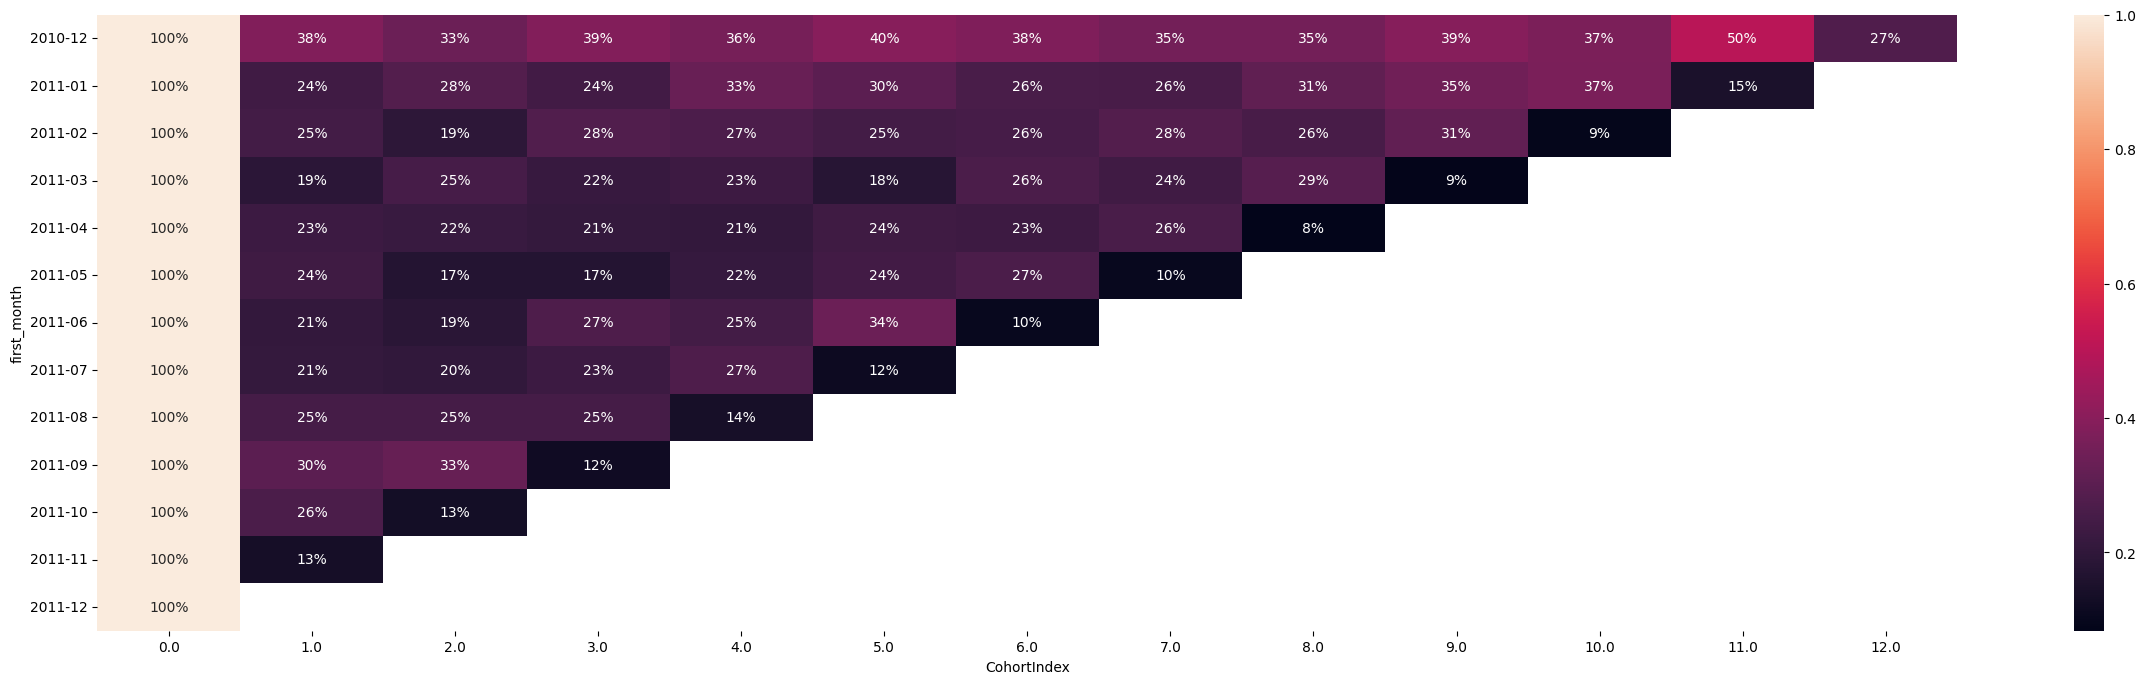

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## 재방문율 시각화 진행
plt.rcParams['figure.figsize'] = (30, 8)
sns.heatmap(retention, annot = True, fmt = '.0%')

plt.yticks(rotation = 360);

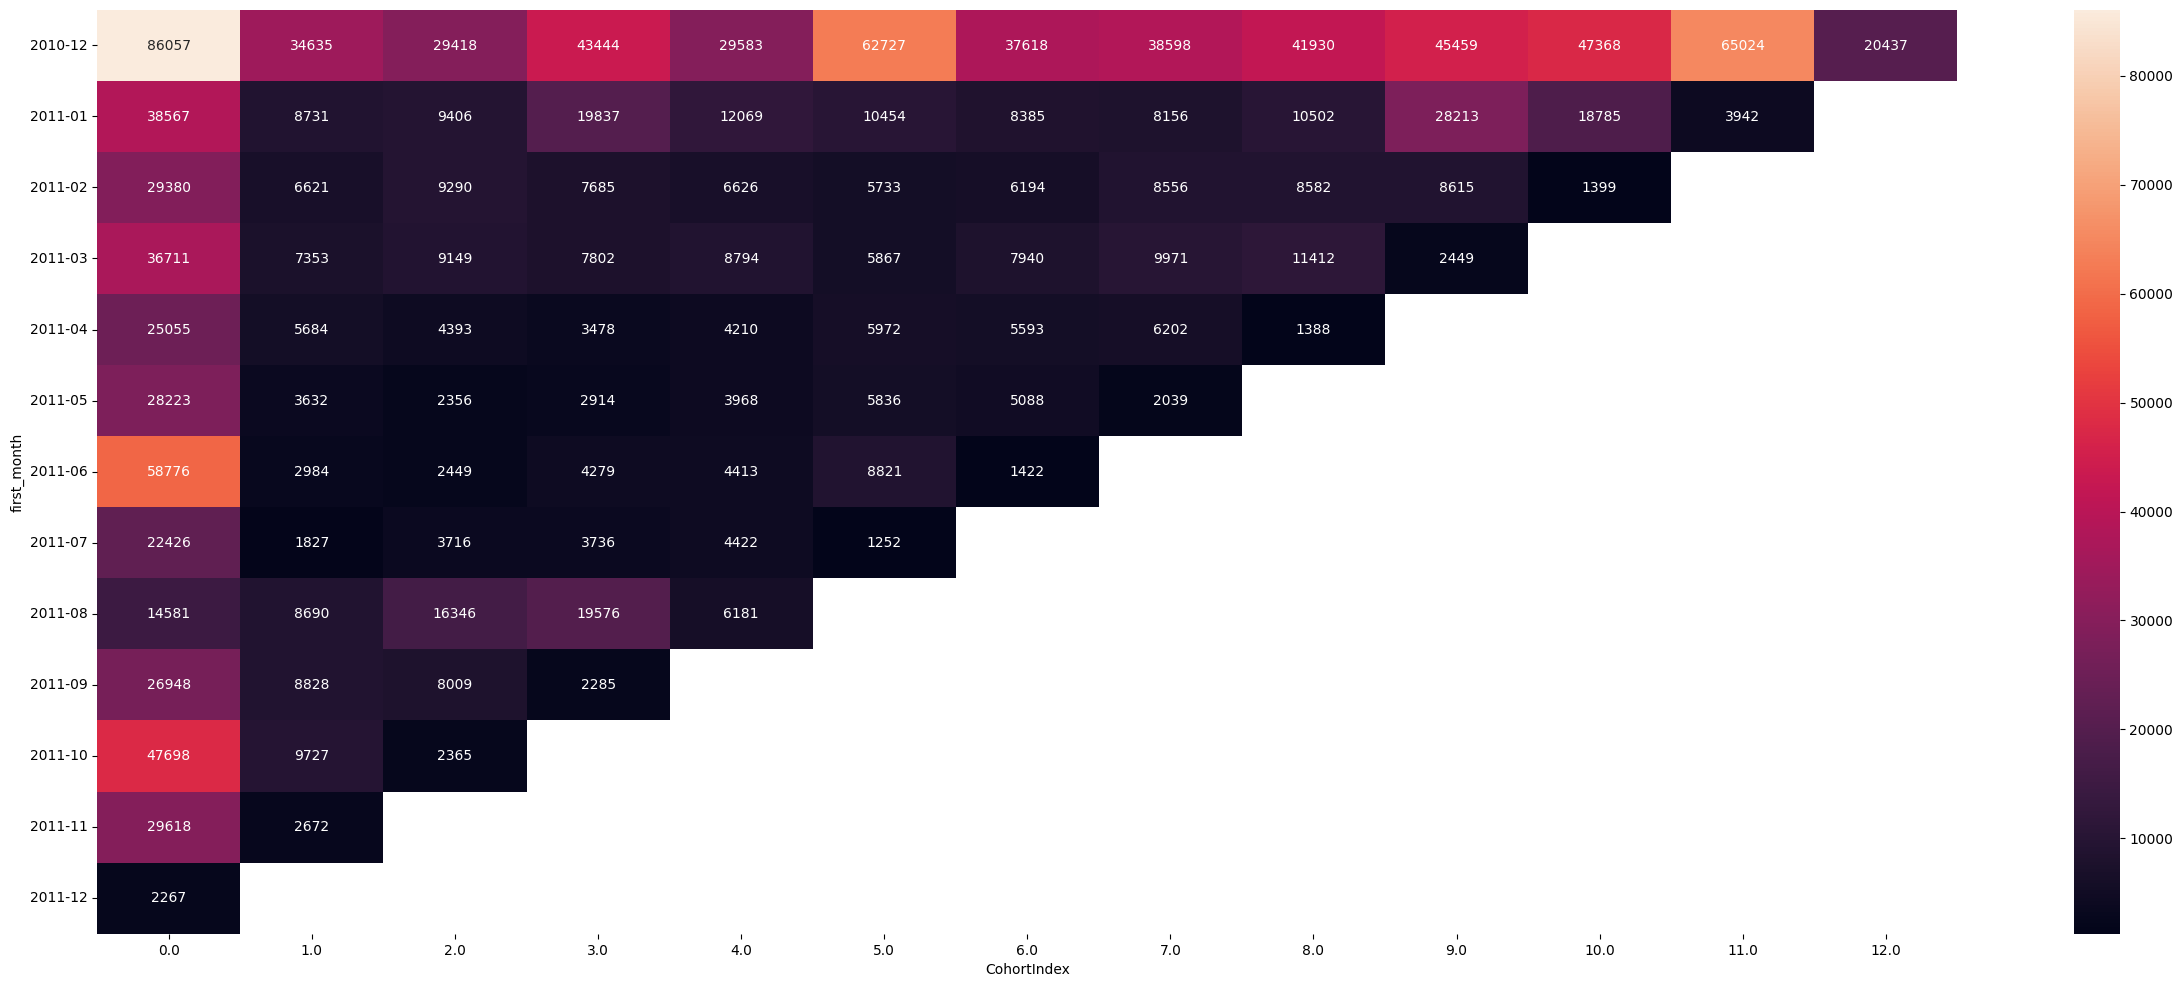

In [ ]:
## 구매 규모 시각화
plt.rcParams['figure.figsize'] = (30, 12)
sns.heatmap(co_purchase, annot = True
            , fmt = '.0f'
           )
plt.yticks(rotation = 360);

#### 분석 결과 정리
- 2010.12 월에 첫 구매를 한 고객군들이 retention이 제일 좋음
- 2011.01 월 이후로 부터는 첫구매 보다는 구매규모가 다음달이 확 줄어듦 (특히 2011.10월이 심함)


# 🥹분석 회고

- KPT 회고

> K [현재 만족 및 이어갔음 하는 부분]
```
프로젝트 완료 후에도 간직하고 싶은 잘했던 것
```
- 코홀트 분석의 개념과 코드를 실습해볼 수 있어서 좋은 경험이였다
- 다양한 데이터 타입(특히 날짜데이터)을 접해볼 수 있었다

> P [개선이 필요한 부분]
```
프로젝트 중 겪었던 어려움
프로젝트 완료 후에도 아쉬움으로 남는 것
```
- 날짜 데이터 중에 period[M]을 처음 접해봤는데, 내가 평소에 사용하던 datetime으로의 데이터 형태 변환하는것에 어려움을 겪었다. 쳇지피티나 구글링을 통해서 해결해보고자 했지만 다 안되고 실패;; 결국 람다 함수를 통해 강제로 숫자만 추출해서 float 형태로 변환시킨게 아쉬움이 남았다.     

> T [P에 대한 해결책]
```
Problem 중 해결된 사항에 대한 해결 방법
해결되지 않은 사항에 대한 피드백
```

- 데이터 형태에 대한 개념이 아직 부족하다고 절실히 느끼게 해줬던 프로젝트였다. 내가 부족한 부분을 또 하나 알게 되었으니 무엇을 공부해야할지, 어떻게 공부해야할지 알게 되어서 방향성을 잡을 수 있을것같다.. 화이팅